<a href="https://colab.research.google.com/github/jsansao/dlvc/blob/main/Licao2bis_MLP_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [68]:
from numpy import genfromtxt
train_data = genfromtxt('train_data.csv', delimiter=',')
train_label = genfromtxt('train_label.csv', delimiter=',')

test_data = genfromtxt('test_data.csv', delimiter=',')
test_label = genfromtxt('test_label.csv', delimiter=',')


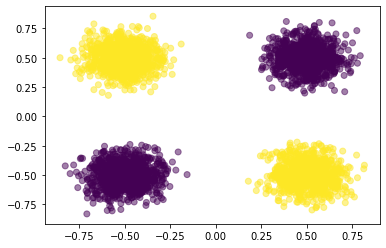

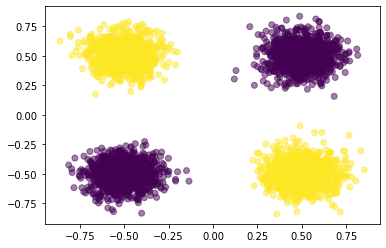

In [112]:
plt.scatter(train_data[:,0], train_data[:,1], c=train_label , alpha=0.5)
plt.show()
plt.scatter(test_data[:,0], test_data[:,1], c=test_label , alpha=0.5)
plt.show()

In [113]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

model.fit(train_data, train_label, epochs=50)

model.summary()

Epoch 1/50
125/125 [==============================] - 0s 992us/step - loss: 0.6019 - accuracy: 0.5073
Epoch 2/50
125/125 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.5002
Epoch 3/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2717 - accuracy: 0.5000
Epoch 4/50
125/125 [==============================] - 0s 995us/step - loss: 0.2561 - accuracy: 0.5000
Epoch 5/50
125/125 [==============================] - 0s 939us/step - loss: 0.2518 - accuracy: 0.4997
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.4893
Epoch 7/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.5070
Epoch 8/50
125/125 [==============================] - 0s 943us/step - loss: 0.2502 - accuracy: 0.5228
Epoch 9/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.4880
Epoch 10/50
125/125 [==============================] - 0s 985us/step - loss: 0.2502 - accura

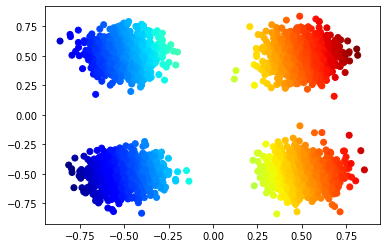

In [156]:
test_predict = model.predict(test_data)

plt.scatter(test_data[:,0], test_data[:,1], c=test_predict , cmap='jet')
plt.show()

In [172]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=[2]),                                                                     
                              tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

#model2.fit(train_data, train_label, epochs=500)


history = model2.fit(train_data, train_label,
                    batch_size=20,
                    epochs=40,
                    verbose=1,
                    validation_data=(test_data, test_label))

model2.summary()

Epoch 1/40
200/200 [==============================] - 1s 3ms/step - loss: 0.2461 - accuracy: 0.5005 - val_loss: 0.2349 - val_accuracy: 0.5058
Epoch 2/40
200/200 [==============================] - 1s 3ms/step - loss: 0.2241 - accuracy: 0.5895 - val_loss: 0.2149 - val_accuracy: 0.7337
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 0.2055 - accuracy: 0.8880 - val_loss: 0.1976 - val_accuracy: 0.9818
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9930 - val_loss: 0.1822 - val_accuracy: 0.9973
Epoch 5/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1744 - accuracy: 0.9995 - val_loss: 0.1678 - val_accuracy: 0.9987
Epoch 6/40
200/200 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 1.0000 - val_loss: 0.1542 - val_accuracy: 0.9987
Epoch 7/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1471 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9987
Epoch 

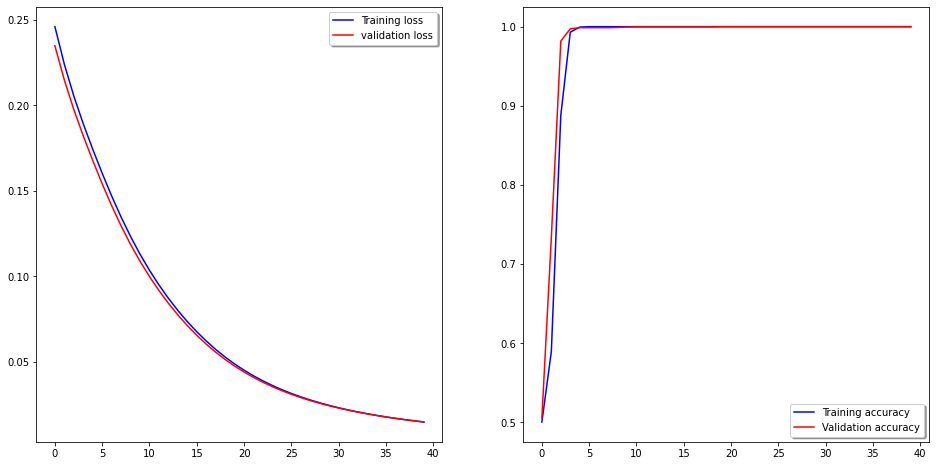

In [173]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



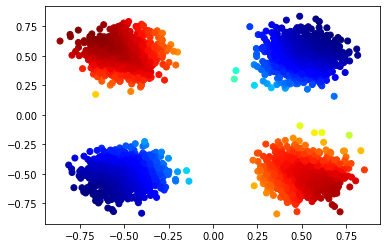

In [174]:

test_predict2 = model2.predict(test_data)

plt.scatter(test_data[:,0], test_data[:,1], c=test_predict2, cmap='jet')
plt.show()